In [5]:
import pandas as pd
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy

In [6]:
df = pd.read_csv("scopus.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14561 entries, 0 to 19998
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            14561 non-null  object 
 1   Author full names  14561 non-null  object 
 2   Author(s) ID       14561 non-null  object 
 3   Title              14561 non-null  object 
 4   Year               14561 non-null  int64  
 5   Source title       14559 non-null  object 
 6   Volume             8831 non-null   object 
 7   Issue              4173 non-null   object 
 8   Art. No.           7468 non-null   object 
 9   Page start         10482 non-null  object 
 10  Page end           10470 non-null  object 
 11  Page count         10472 non-null  float64
 12  Cited by           14561 non-null  float64
 13  DOI                14284 non-null  object 
 14  Link               14561 non-null  object 
 15  Abstract           14561 non-null  object 
 16  Author Keywords    145

In [25]:
df['Abstract'][1]

'Interference is a common problem in wireless communication, navigation and radar systems. A wide variety of interferences are used to degrade the communication quality especially in electronic warfare environment. In modern military communication systems, interference classification is an important module for its ability to obtain prior interference information before adopting related anti-interference method. This paper proposes a deep learning based interference classification method, which applies one-dimension convolutional neural networks to automatically extract interference features for classification. Computer simulations show better classification performance and lower computational complexity. Meanwhile, this proposed method is implied on software defined radios (SDR) hardware, more than 99% correct classification probability can be achieved with limited samples of the received signal, which verifies the robustness of this proposed method. © 2023 Elsevier B.V.'

In [7]:
df = df.dropna(subset=['Authors','Abstract','Author Keywords','Index Keywords'])

In [10]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [11]:
# Words to exclude
exclude_words = {"software", "defined", "network", 'networks','networking','using','g', "sdn", "software-defined",'based','enabled','system','service'}

In [12]:
# Initialize a dictionary to store keywords by year
keywords_by_year = defaultdict(list)

In [13]:
# Process titles and extract keywords
for index, row in df.iterrows():
    doc = nlp(row["Title"])
    keywords = [token.text.lower() for token in doc if
                token.text.lower() not in exclude_words and re.match(r"^[a-zA-Z]+$", token.text)]
    keywords_by_year[row["Year"]].extend(keywords)

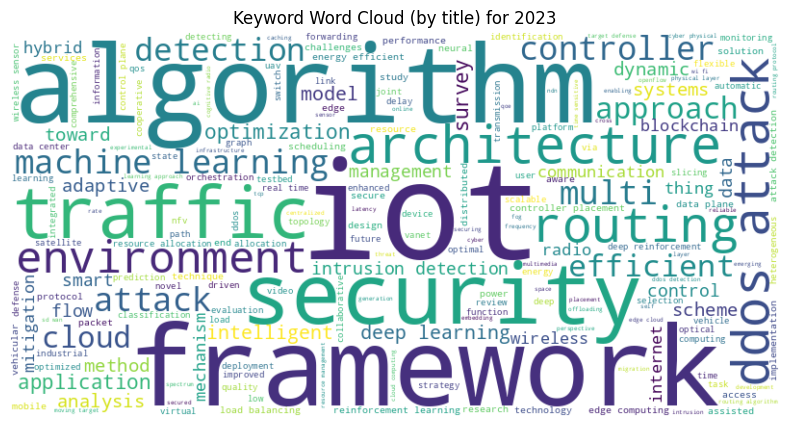

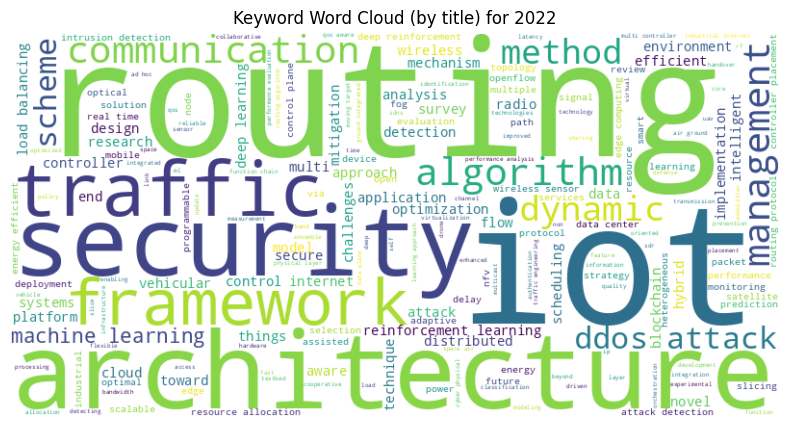

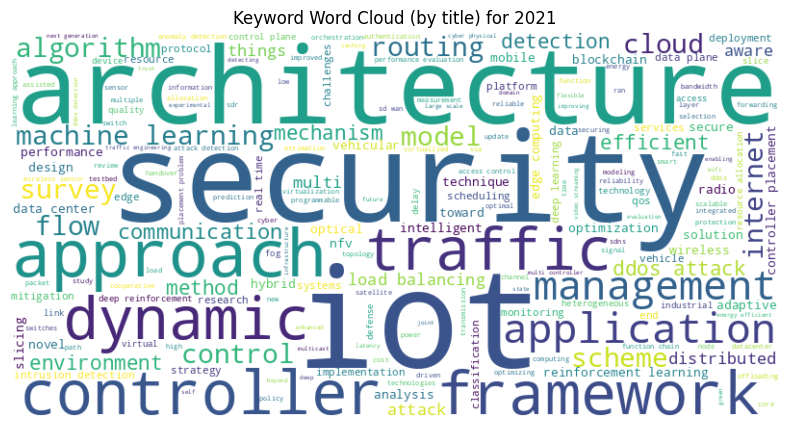

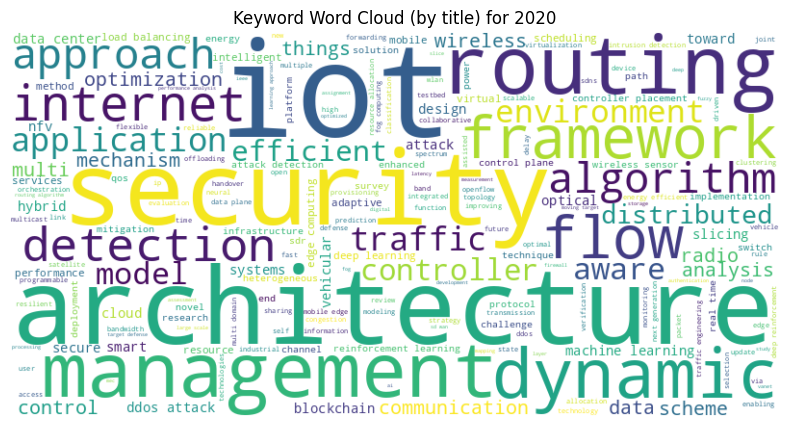

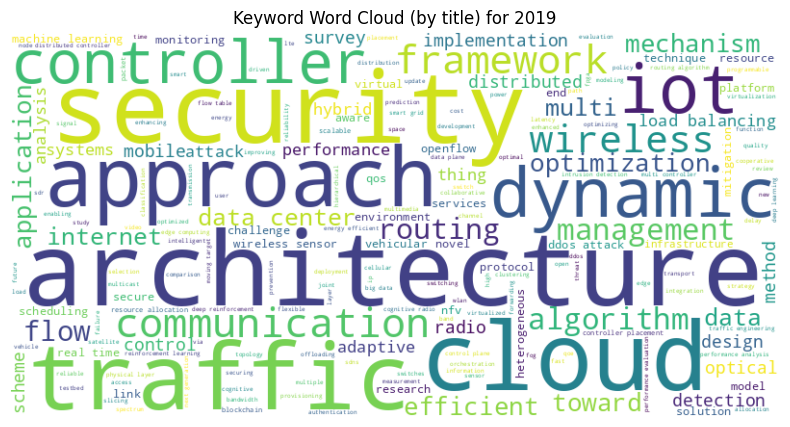

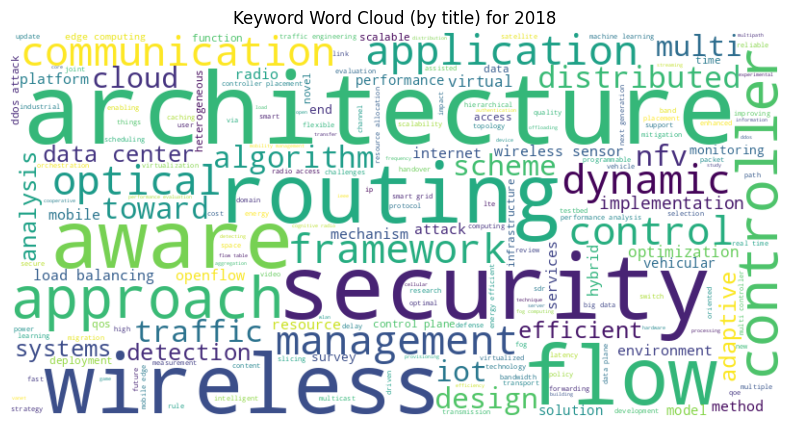

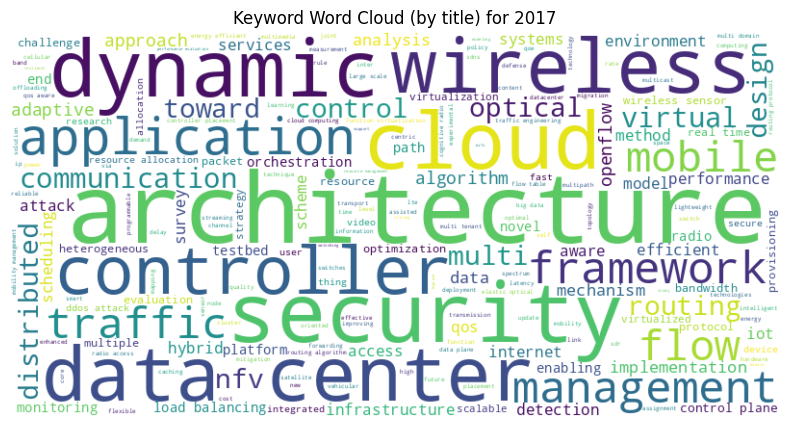

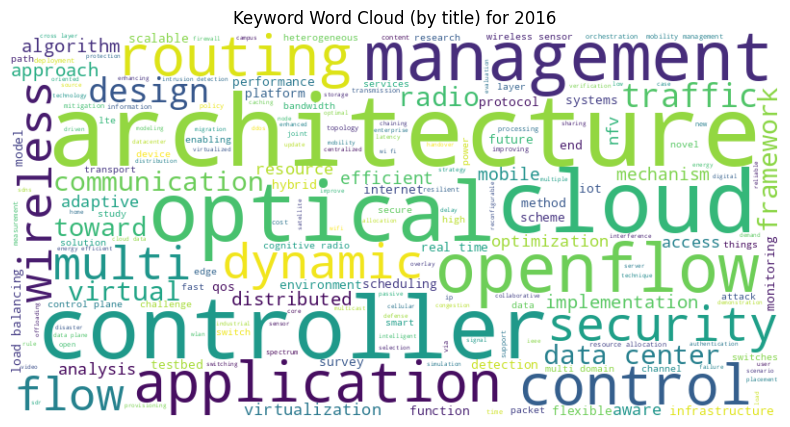

In [14]:
# Create word clouds for each year
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud (by title) for {year}")
    plt.axis("off")
    plt.show()

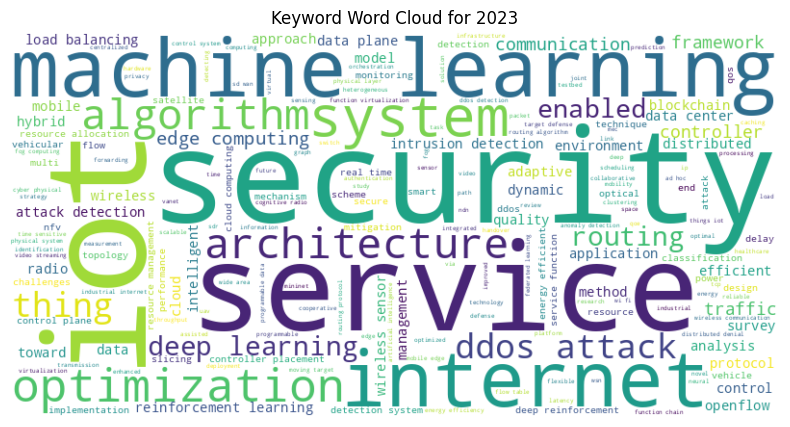

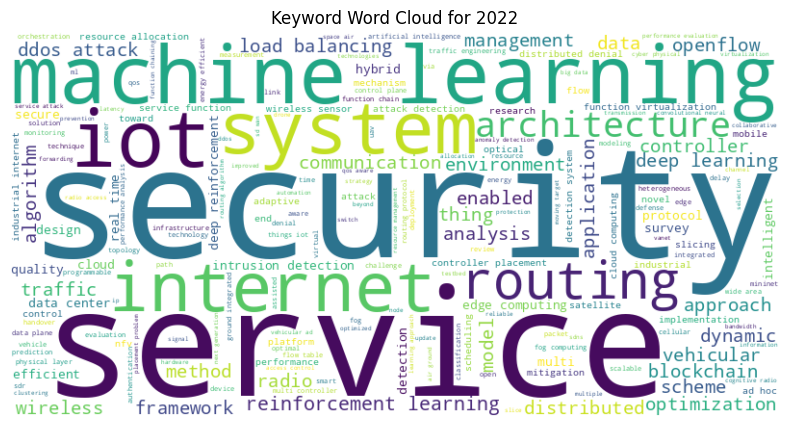

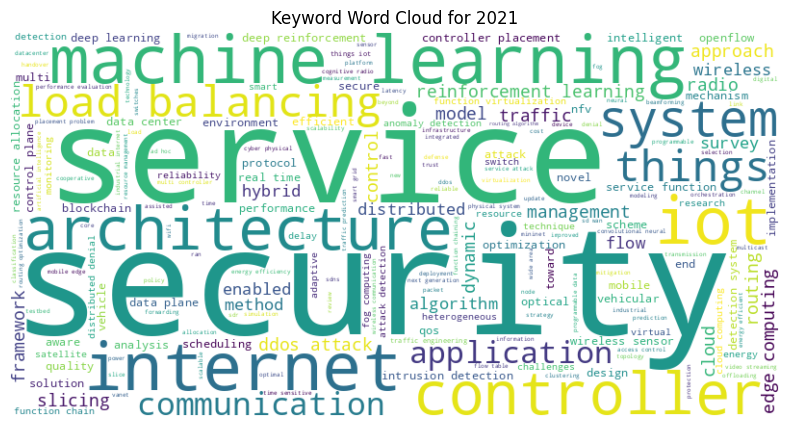

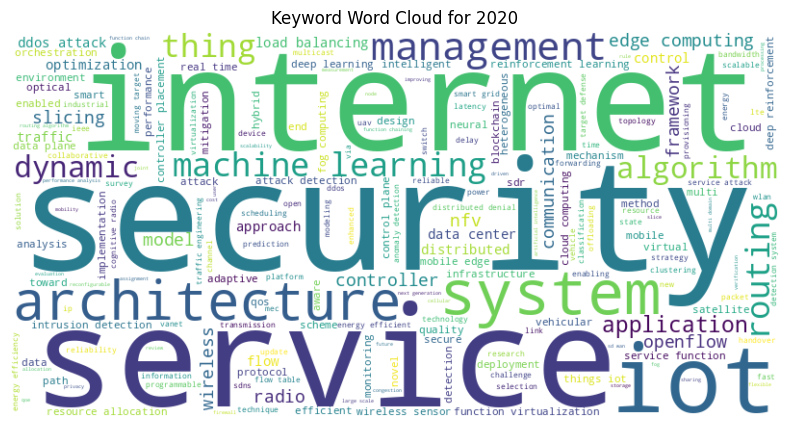

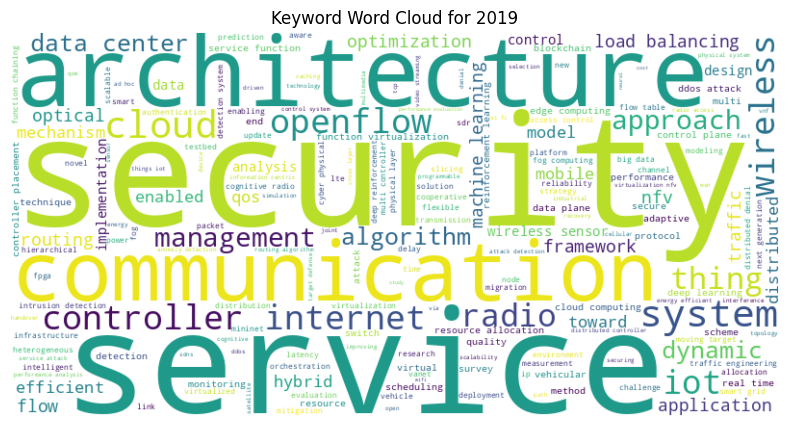

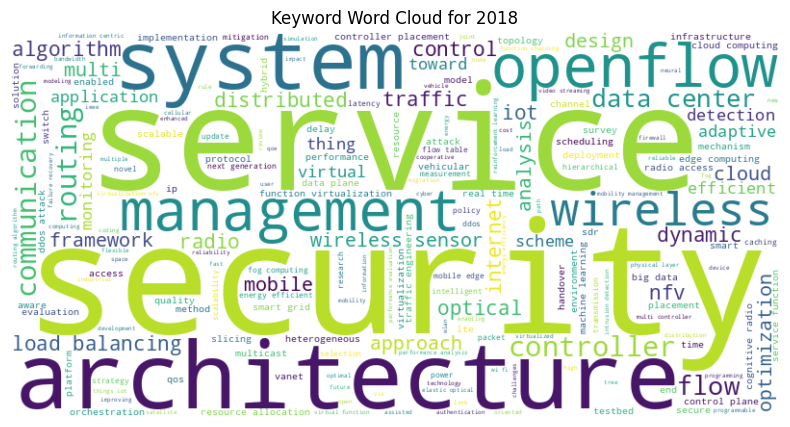

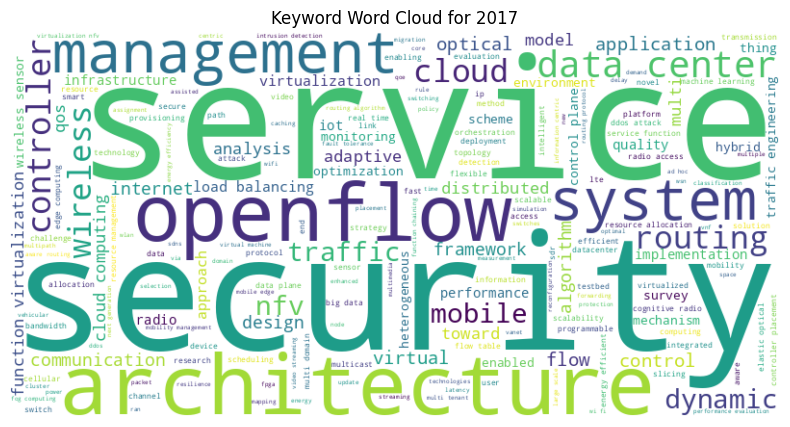

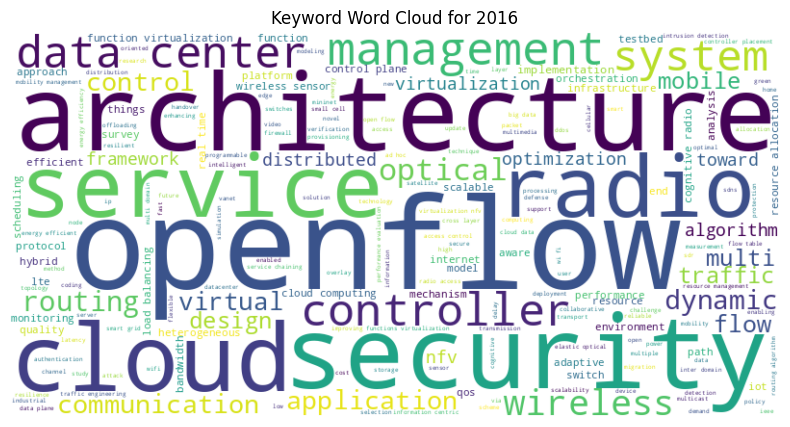

In [88]:
# Create word clouds for each year (by Author Keywords)
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud (by keyword) for {year}")
    plt.axis("off")
    plt.show()

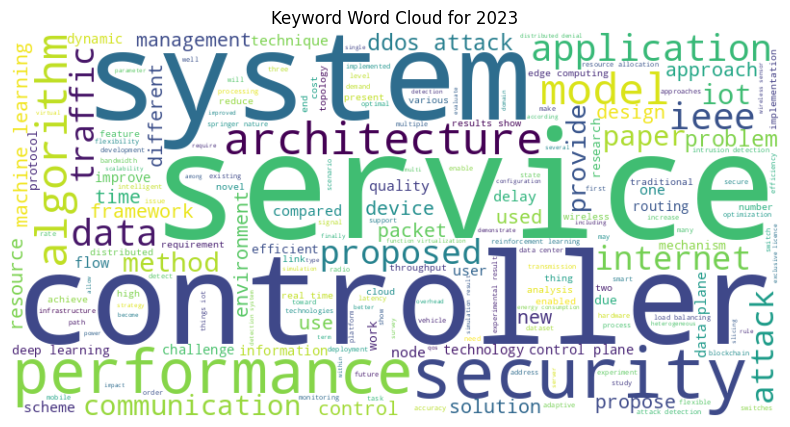

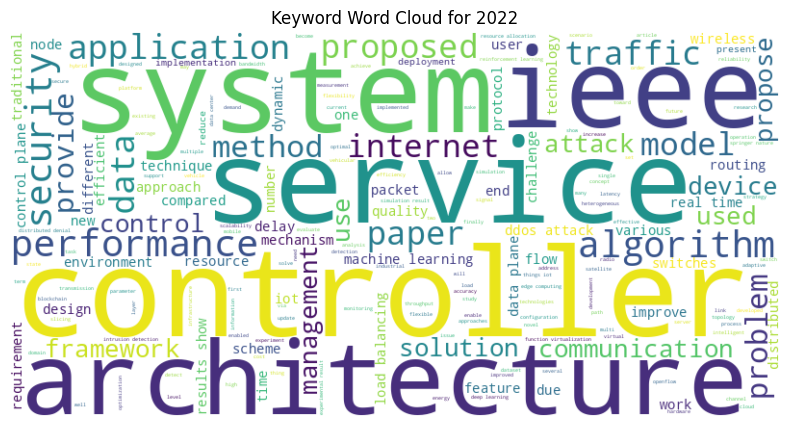

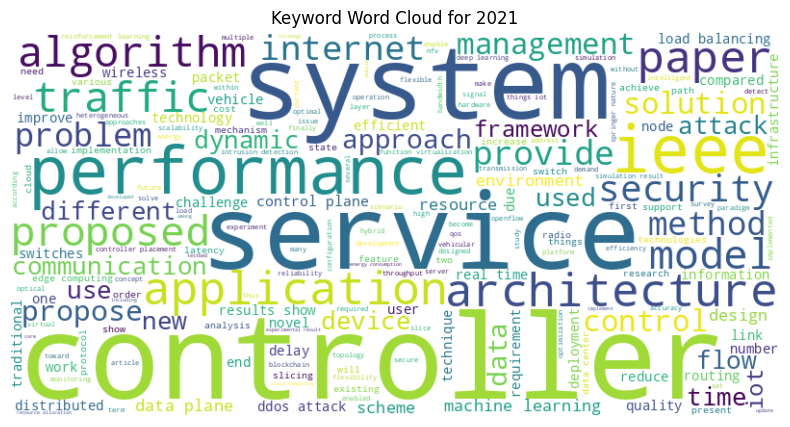

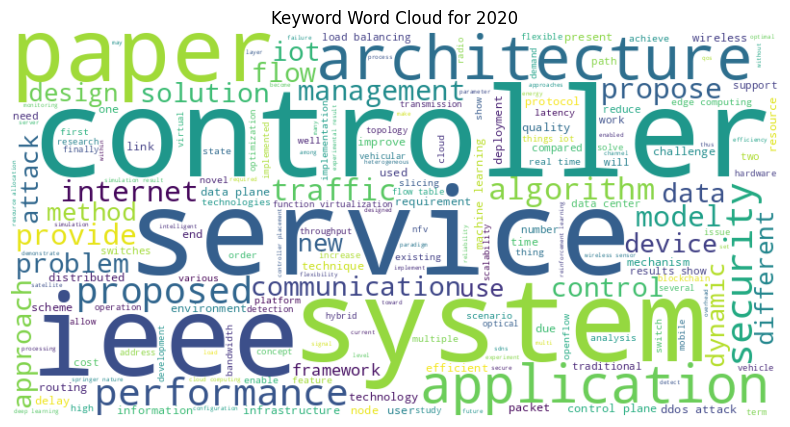

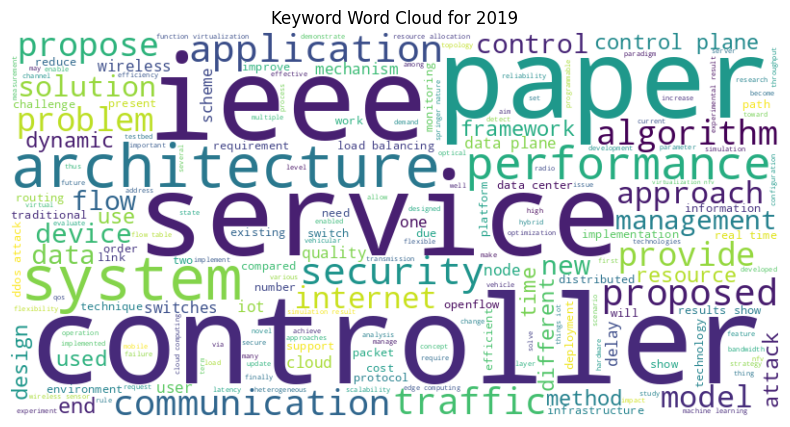

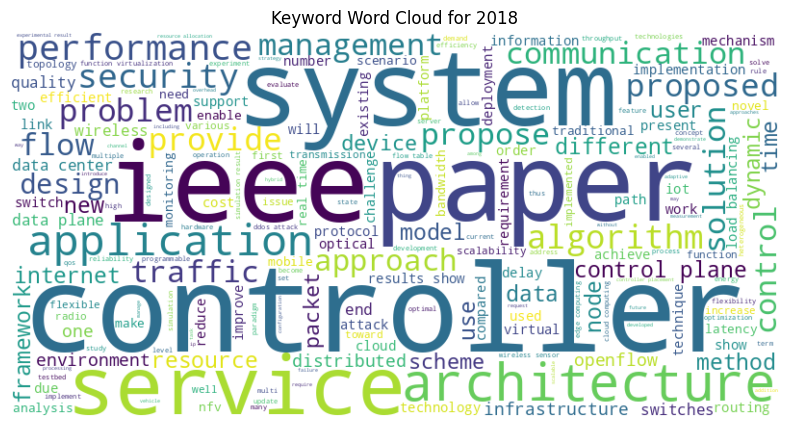

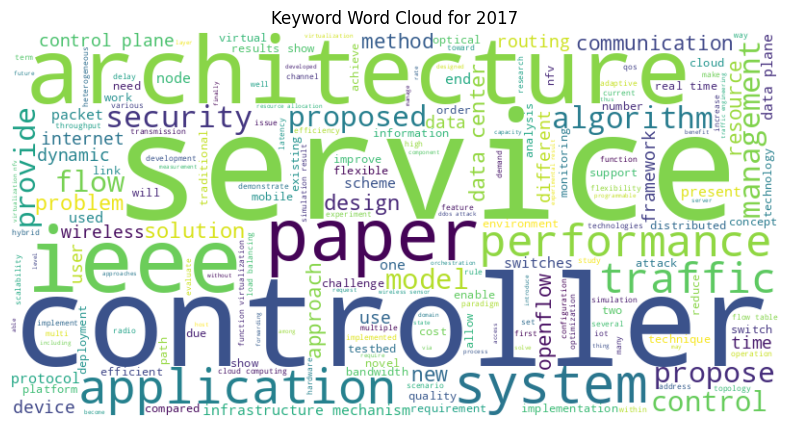

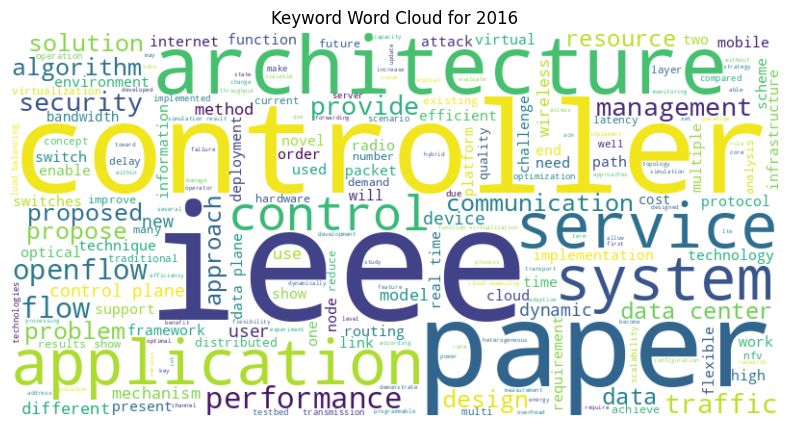

In [90]:
# Create word clouds for each year (by Author Keywords)
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud (by abstract) for {year}")
    plt.axis("off")
    plt.show()